In [85]:
import numpy as np
import matplotlib.pylab as plt
import scipy.fftpack as sci
import seaborn as sns
from scipy import stats
import math
%matplotlib inline

ARR = []
for i in np.arange(9):
    name = "lab1_" + str(i+1) + "0" + "p_1.npy"
    ARR.append(np.load(name))
    

    

In [ ]:
# 3.2 Data Collection
for i in np.arange(9):
    plt.figure(figsize=(20,3))
    plt.plot(ARR[i][0:2**10], 'k.-')
    plt.title(str(i+1) +"0" + "%")
    plt.ylabel("Voltage")
    plt.xlabel("Time [Nano Second]")
    plt.grid(True)
    plt.show()

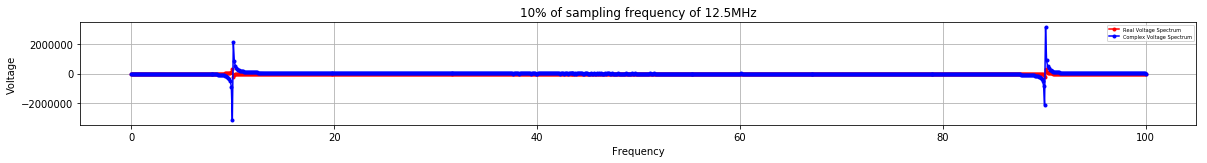

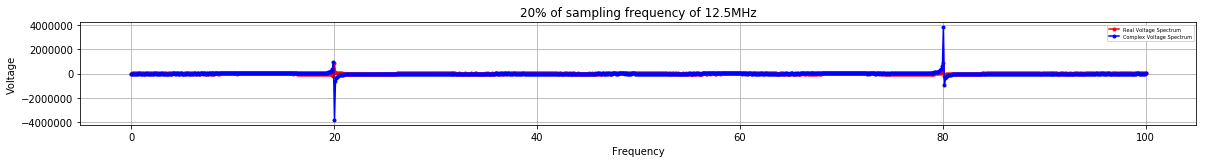

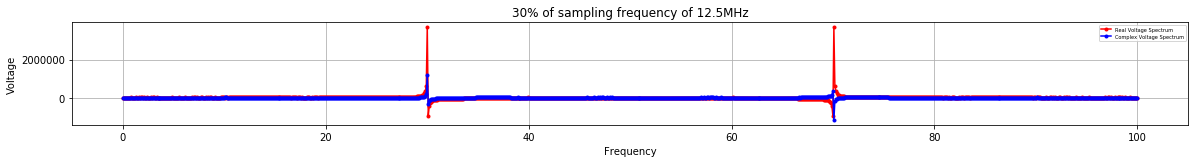

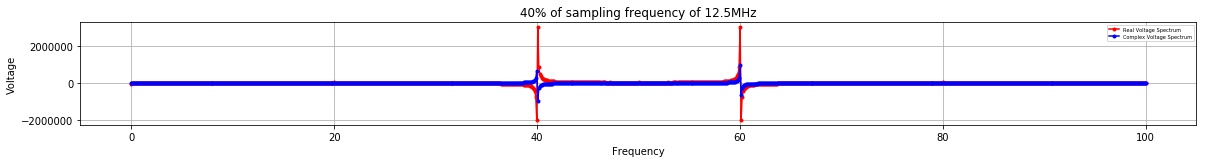

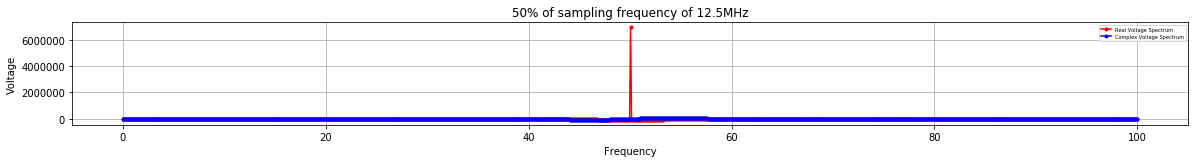

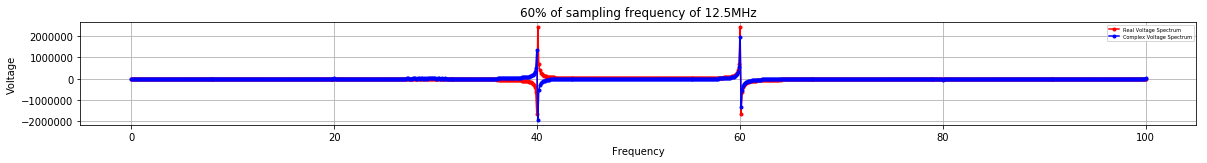

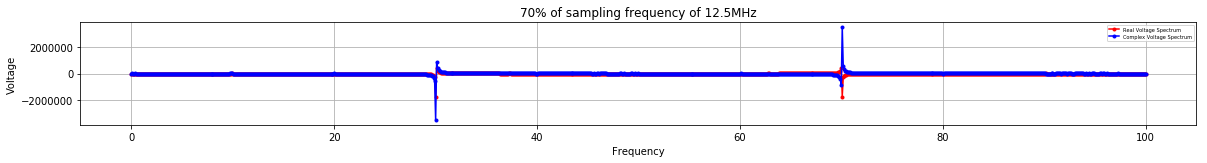

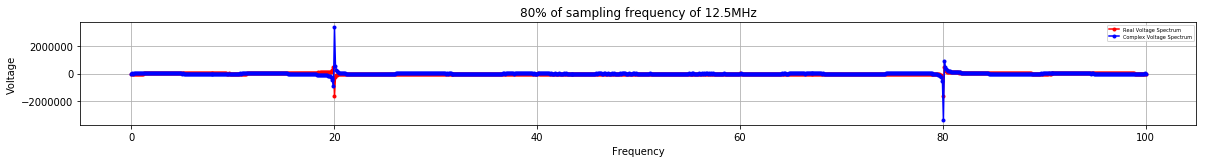

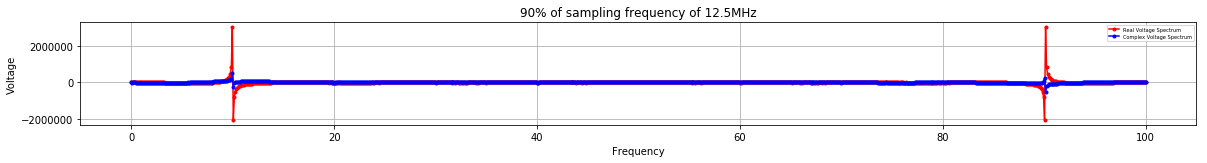

In [4]:
#3.3 Voltage Spectrum
N = 2**10
freq = np.linspace(0,100, N)
for i in range(1,10):
    EF = sci.fft(ARR[i-1][0:N])
    real = []
    imag = []
    for num in EF:
        real.append(num.real)
        imag.append(num.imag)
    lit = 910 + i
    plt.figure(figsize=(20,20))
    plt.subplot(lit)
    plt.plot(freq, real, 'r.-')
    plt.plot(freq, imag, 'b.-')
    plt.xlabel('Frequency')
    plt.ylabel('Voltage')
    plt.legend(['Real Voltage Spectrum','Complex Voltage Spectrum'],loc='upper right',fontsize = 5)
    plt.title(str(i) + '0% of sampling frequency of 12.5MHz')
    plt.grid(True)
    plt.show()

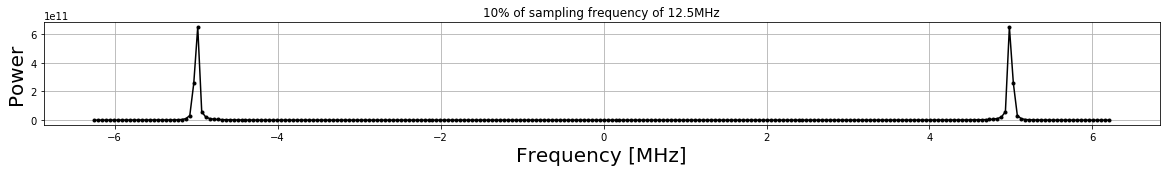

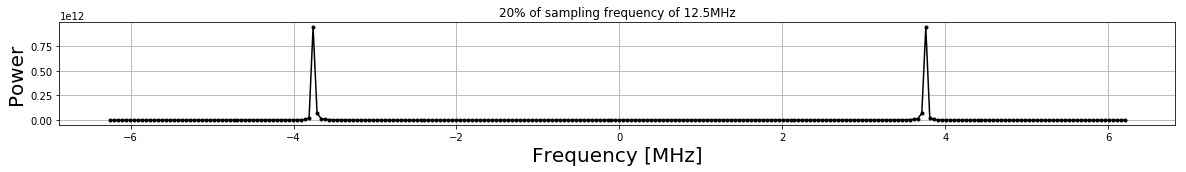

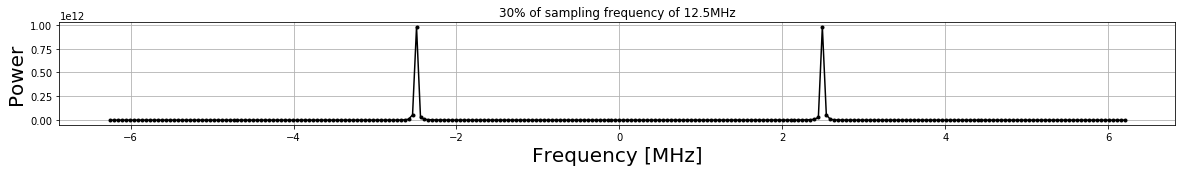

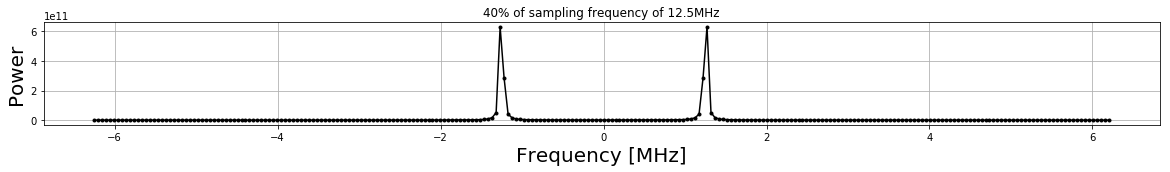

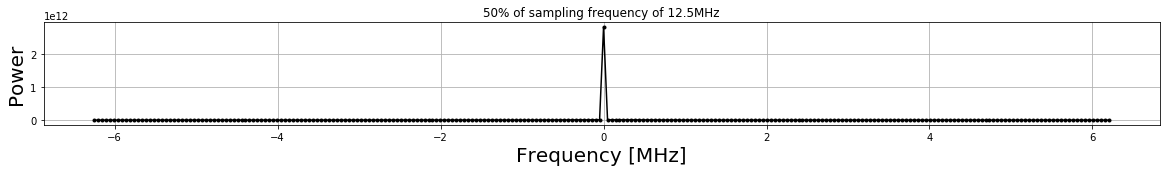

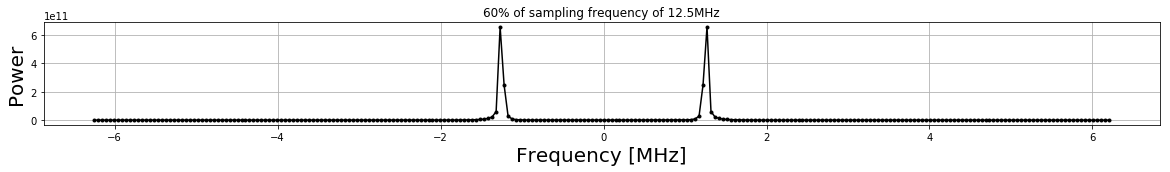

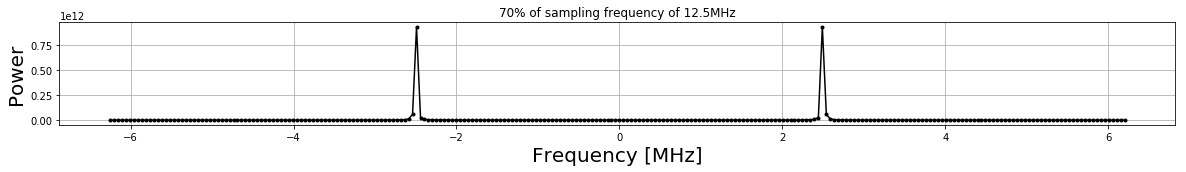

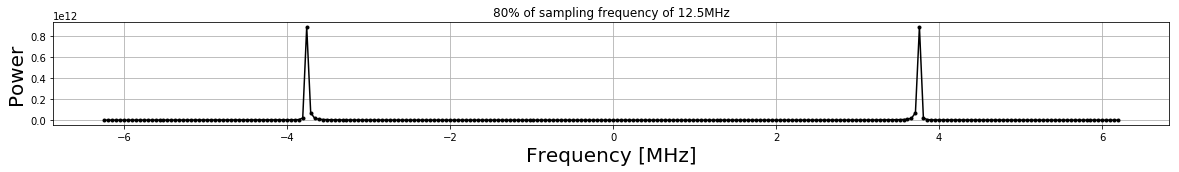

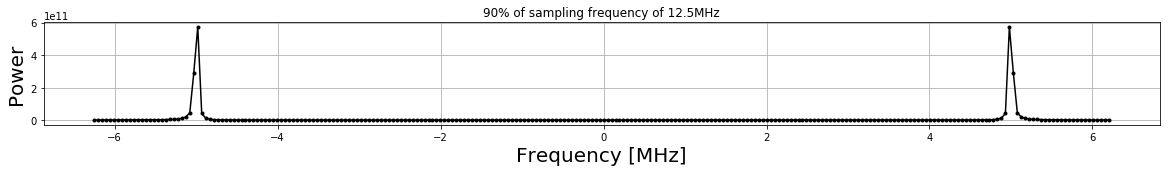

In [94]:
#3.3 Power Spectra

def get_FPS(sample):
    N = 2**8
    v_samp = 12.5e6
    freq = np.linspace(0,100, sample)
    t = np.linspace(-N/(2*v_samp), ((N/2) - 1)/v_samp, N)
    f = np.linspace(-(v_samp/2), (v_samp/2)*(1-(2/N)), N)
    for i in np.arange(9):
        EF = sci.fft(ARR[i][0:sample])
        Power_spectra = np.abs(EF)**2
        plt.figure(figsize=[20,20])
        num = 910+i
        plt.subplot(num)
        plt.plot(f/1e6,Power_spectra[0:sample], 'k.-')
        plt.xlabel("Frequency [MHz]",fontsize=20)
        plt.ylabel('Power', fontsize=20)
        plt.title(str(i+1) + '0% of sampling frequency of 12.5MHz')
        plt.grid(True)
        plt.show()
get_FPS(2**8)

In [88]:
#3.4 Leakage?
v_samp = 12.5e6

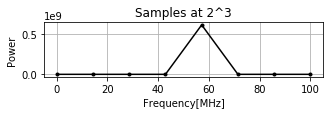

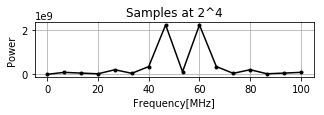

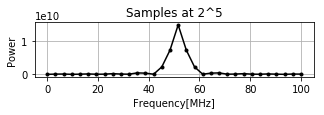

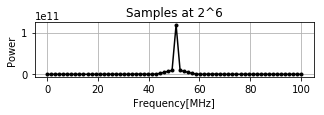

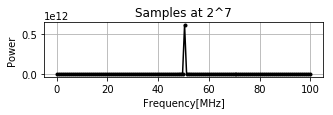

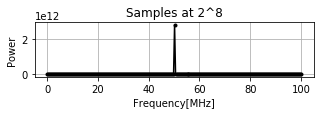

In [84]:
#3.5 Frequency Resolution
vsamp = 12.5e6 #in nano second
for i in np.arange(3,9):
    freq = np.linspace(0,100, 2**i)
    EF5 = (ARR[4][0:2**i])
    ft = sci.fft(EF5)
    power5 = np.abs(ft)**2
    plt.figure(figsize=(5,1))
    plt.plot(freq, power5, 'k.-')
    plt.title('Samples at 2^' + str(i))
    plt.xlabel('Frequency[MHz]')
    plt.ylabel('Power')
    plt.grid(True)
    plt.show()

In [ ]:
#3.6 Nyquist Windows

My mean of d0 is 305.152
My squared mean of d0 is 6736576.512
My RMS of d0 is 2595.49157425


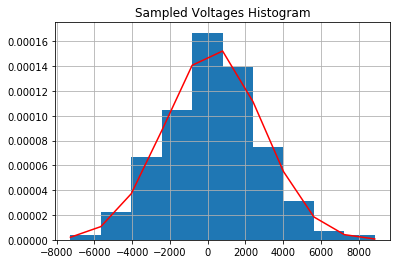

In [83]:
#3.7 FTs of Noise

data = np.load('data32_real.npz')
d0 = data['arr_0']

#Mean Voltage, Mean square and RMS
d0mean = np.mean(d0)
print('My mean of d0 is ' + str(d0mean))
d0mean = np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))
print('My squared mean of d0 is ' + str(np.mean(np.array([d0[i]**2 for i in np.arange(len(d0))]))))
d0rms = np.sqrt(d0mean)
print('My RMS of d0 is ' + str(d0rms))

#Histogram

mu, sigma = np.mean(d0), np.sqrt(np.var(d0)) # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 10, normed=True)
plt.grid(True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ), color='r')
plt.title("Sampled Voltages Histogram")
plt.show()

#Normalized